In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', sep='\t')

In [3]:
df

,number_bedrooms,number_bath,area,property_address,price
0,2,2,1.200,Chicago,409900
1,2,1,1.000,Chicago,178804
2,2,1,None,Chicago,384900
3,3,2.5,1.617,Chicago,185000
4,3,1.5,1.048,Chicago,338000
...,...,...,...,...,...
345,3,2.5,2.300,Chicago,1249500
346,2,1,850,Oak Lawn,125000
347,None,None,4356 (Lot),Chicago,23000
348,4,1,1.594,Chicago,68000


### Preprocressing

In [29]:
# chack None data in dataframe
print('Number_bedrooms  ', df['number_bedrooms'].apply(lambda x: x == "None").value_counts())
print("skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk")
print('number_bath  ', df['number_bath'].apply(lambda x: x == "None").value_counts())
print("skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk")
print('area  ', df['area'].apply(lambda x: x == "None").value_counts())
print("skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk")
print('price  ', df['price'].apply(lambda x: x == "None").value_counts())
print("skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk")
print('property_address  ', df['property_address'].apply(lambda x: x == "None").value_counts())

Number_bedrooms   False    341
Name: number_bedrooms, dtype: int64
skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
number_bath   False    341
Name: number_bath, dtype: int64
skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
area   False    341
Name: area, dtype: int64
skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
price   False    341
Name: price, dtype: int64
skkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
property_address   False    341
Name: property_address, dtype: int64


In [30]:
# chack null data in dataframe
print('Number_bedrooms  ', df['number_bedrooms'].isnull().value_counts())
print('number_bath  ', df['number_bath'].isnull().value_counts())
print('area  ', df['area'].isnull().value_counts())
print('price  ', df['price'].isnull().value_counts())
print('property_address  ', df['property_address'].isnull().value_counts())

Number_bedrooms   False    341
Name: number_bedrooms, dtype: int64
number_bath   False    341
Name: number_bath, dtype: int64
area   False    236
True     105
Name: area, dtype: int64
price   False    341
Name: price, dtype: int64
property_address   False    341
Name: property_address, dtype: int64


In [6]:
df[['area']]  =  df[['area']].replace(
     to_replace='None', value=np.nan)

In [7]:
# drop data Nane in dataframe (columns: Number_bedrooms, number_bath)
df[['number_bedrooms', 'number_bath']]  =  df[['number_bedrooms', 'number_bath']].replace(
     to_replace='None', value=np.nan)
df = df.dropna(subset=['number_bedrooms', 'number_bath'])
df

,number_bedrooms,number_bath,area,property_address,price
0,2,2,1.200,Chicago,409900
1,2,1,1.000,Chicago,178804
2,2,1,NaN,Chicago,384900
3,3,2.5,1.617,Chicago,185000
4,3,1.5,1.048,Chicago,338000
...,...,...,...,...,...
344,8,3,NaN,Chicago,1099999
345,3,2.5,2.300,Chicago,1249500
346,2,1,850,Oak Lawn,125000
348,4,1,1.594,Chicago,68000


In [8]:
df[['property_address']] = df[['property_address']].apply(lambda col: pd.factorize(col, sort=True)[0])
df

C:\Users\Hanieh\AppData\Local\Temp\ipykernel_11872\3331866629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['property_address']] = df[['property_address']].apply(lambda col: pd.factorize(col, sort=True)[0])


,number_bedrooms,number_bath,area,property_address,price
0,2,2,1.200,1,409900
1,2,1,1.000,1,178804
2,2,1,NaN,1,384900
3,3,2.5,1.617,1,185000
4,3,1.5,1.048,1,338000
...,...,...,...,...,...
344,8,3,NaN,1,1099999
345,3,2.5,2.300,1,1249500
346,2,1,850,4,125000
348,4,1,1.594,1,68000


In [9]:
df[['price']].value_counts()

price  
275000     7
164900     6
450000     6
549900     5
750000     5
          ..
374900     1
379000     1
379900     1
384900     1
6495000    1
Length: 226, dtype: int64

### Analized Data

In [10]:
# convert object to int
df['number_bedrooms']= pd.to_numeric(df['number_bedrooms'])

df['number_bath']= pd.to_numeric(df['number_bath'])

df['area']= pd.to_numeric(df['area'])

df['price']= df['price'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 349
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number_bedrooms   341 non-null    int64  
 1   number_bath       341 non-null    float64
 2   area              236 non-null    float64
 3   property_address  341 non-null    int64  
 4   price             341 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.0 KB


C:\Users\Hanieh\AppData\Local\Temp\ipykernel_11872\3772652479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_bedrooms']= pd.to_numeric(df['number_bedrooms'])
C:\Users\Hanieh\AppData\Local\Temp\ipykernel_11872\3772652479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_bath']= pd.to_numeric(df['number_bath'])
C:\Users\Hanieh\AppData\Local\Temp\ipykernel_11872\3772652479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [11]:
df[['number_bedrooms']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 349
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   number_bedrooms  341 non-null    int64
dtypes: int64(1)
memory usage: 5.3 KB


array([[<AxesSubplot:title={'center':'number_bedrooms'}>,
        <AxesSubplot:title={'center':'number_bath'}>],
       [<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'property_address'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

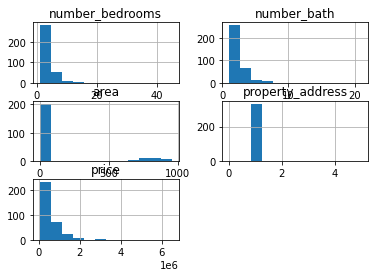

In [12]:
df.hist(bins=12)

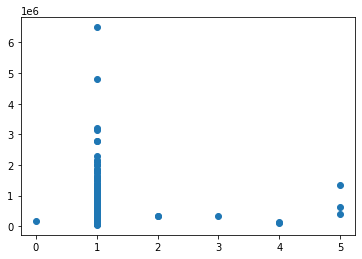

In [13]:
plt.scatter(df['property_address'], df['price'])
# df['price']

#### choice x and y feature


In [14]:
df.columns

Index(['number_bedrooms', 'number_bath', 'area', 'property_address', 'price'], dtype='object')

In [15]:
x = df[['number_bedrooms', 'number_bath', 'area', 'property_address']].values
y = df[['price']].values
print(type(x))

<class 'numpy.ndarray'>


#### feature selection
###### 1) feature selection with VarianceThreshold 
###### 2) SelectKBest 
###### 3) SelectFromModel 

In [16]:
# VarianceThreshold
import sklearn.feature_selection as fs

var = fs.VarianceThreshold(threshold=0.3)
var.fit(x)
x_trans = var.transform(x)

print("The original data")
print(x)
print("The processed data by variance threshold")
print(x_trans)

The original data
[[  2.      2.      1.2     1.   ]
 [  2.      1.      1.      1.   ]
 [  2.      1.        nan   1.   ]
 ...
 [  2.      1.    850.      4.   ]
 [  4.      1.      1.594   1.   ]
 [  5.      2.5     1.214   1.   ]]
The processed data by variance threshold
[[  2.      2.      1.2  ]
 [  2.      1.      1.   ]
 [  2.      1.        nan]
 ...
 [  2.      1.    850.   ]
 [  4.      1.      1.594]
 [  5.      2.5     1.214]]


In [28]:
# SelectKBest
import sklearn.datasets as datasets
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# bk = fs.SelectKBest(f_regression, 3)
# bk.fit(X, y)
# X_trans = bk.transform(X)

f1_list = []
for k in range(1, 5):
    bk = fs.SelectKBest(LogisticRegression, k=k)
    bk.fit(x, y)
    X_trans = bk.transform(x)
    train_x, test_x, train_y, test_y = train_test_split(X_trans,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)
    lr = LogisticRegression()
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    f1 = metrics.f1_score(test_y, y_pred)
    f1_list.append(f1)

fig, axe = plt.subplots(dpi = 300)
axe.plot(range(1, 15), f1_list)
axe.set_xlabel("best k features")
axe.set_ylabel("F1-score")
fig.savefig("output/img.png")
plt.close(fig)


ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values